# Percentiles, Deciles, and Quartiles

#### Percentiles

**Definition**:
Percentiles divide a dataset into 100 equal parts. The nth percentile is the value below which n percent of the data falls.

**Formula**:
To find the nth percentile, sort the data in ascending order and use the formula:
$$ P_n = \frac{n}{100} \times (N + 1) $$
where $ N $ is the number of data points.

**Explanation**:
- The 50th percentile is the median.
- The 25th percentile (Q1) is the value below which 25% of the data falls.
- The 75th percentile (Q3) is the value below which 75% of the data falls.

**Application**:
Percentiles are widely used in data science to understand the distribution of data, such as in standardized test scores, where percentiles indicate the relative performance of individuals.

#### Deciles

**Definition**:
Deciles divide a dataset into 10 equal parts. The nth decile is the value below which n/10 of the data falls.

**Formula**:
To find the nth decile, sort the data in ascending order and use the formula:
$$ D_n = \frac{n}{10} \times (N + 1) $$

**Explanation**:
- The 1st decile (D1) is the 10th percentile.
- The 5th decile (D5) is the median (50th percentile).
- The 9th decile (D9) is the 90th percentile.

**Application**:
Deciles are useful for dividing data into broad categories, such as income distributions, where they can help identify different socioeconomic groups.

#### Quartiles

**Definition**:
Quartiles divide a dataset into 4 equal parts. Each quartile represents 25% of the data.

**Formula**:
To find the quartiles, sort the data in ascending order and use the following formulas:
- $ Q1 = 25th $ percentile
- $ Q2 = 50th $ percentile (median)
- $ Q3 = 75th $ percentile

**Explanation**:
- Q1 (first quartile) is the value below which 25% of the data falls.
- Q2 (second quartile) is the median, below which 50% of the data falls.
- Q3 (third quartile) is the value below which 75% of the data falls.

**Application**:
Quartiles are often used in descriptive statistics to summarize data distributions, such as in box plots, which visualize the 5-point summary (minimum, Q1, median, Q3, maximum).

In [1]:
import numpy as np

# Sample data
data = [3, 7, 8, 5, 12, 14, 21, 13, 18, 20, 5, 9, 11, 19, 6, 17, 15, 10, 4, 16]

In [2]:
# Sort the data
data.sort()

# Calculate percentiles
percentiles = [np.percentile(data, p) for p in range(0, 101, 10)]
print(f"Percentiles (0th to 100th, every 10th): {percentiles}")

Percentiles (0th to 100th, every 10th): [3.0, 4.9, 5.800000000000001, 7.7, 9.600000000000001, 11.5, 13.4, 15.299999999999999, 17.200000000000003, 19.1, 21.0]


In [3]:
# Calculate deciles
deciles = [np.percentile(data, d * 10) for d in range(1, 10)]
print(f"Deciles (10th to 90th): {deciles}")

Deciles (10th to 90th): [4.9, 5.800000000000001, 7.7, 9.600000000000001, 11.5, 13.4, 15.299999999999999, 17.200000000000003, 19.1]


In [39]:
# Calculate quartiles
Q1 = np.percentile(data, 25)
Q2 = np.percentile(data, 50)  # This is the median
Q3 = np.percentile(data, 75)
print(f"Quartiles: Q1 = {Q1}, Q2 (Median) = {Q2}, Q3 = {Q3}")

Quartiles: Q1 = 6.75, Q2 (Median) = 11.5, Q3 = 16.25


In [40]:
# Calculate the 5-point summary
min_val = np.min(data)
max_val = np.max(data)
five_point_summary = [min_val, Q1, Q2, Q3, max_val]
print(f"5-Point Summary: {five_point_summary}")


5-Point Summary: [3, 6.75, 11.5, 16.25, 21]


### Interquartile Range (IQR)

**Definition**:
The Interquartile Range (IQR) is a measure of statistical dispersion, or how spread out the data points are. It is the range between the first quartile (Q1) and the third quartile (Q3).

**Formula**:
$\text{IQR} = Q3 - Q1$

**Explanation**:
- Q1 (first quartile) is the 25th percentile of the data.
- Q3 (third quartile) is the 75th percentile of the data.
- The IQR represents the middle 50% of the data. It is a robust measure of variability because it is not affected by outliers or extreme values.

**Application**:
The IQR is used to identify outliers and understand the spread of the middle portion of the data.

### Box and Whisker Plots

**Definition**:
A box and whisker plot (or simply, box plot) is a graphical representation of the distribution of a dataset. It shows the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum, as well as potential outliers.

**Components**:
1. **Box**: The box represents the IQR (from Q1 to Q3).
2. **Whiskers**: Lines extending from the box to the minimum and maximum values within 1.5 * IQR from Q1 and Q3, respectively.
3. **Median Line**: A line inside the box representing the median (Q2).
4. **Outliers**: Points outside the whiskers are considered outliers.

**Application**:
Box plots are used to visualize the central tendency, spread, and skewness of data, and to identify outliers.

### Outlier Analysis Based on Box and Whisker Plot

**Identification of Outliers**:
- Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

**Steps**:
1. Calculate Q1 and Q3.
2. Compute the IQR (Q3 - Q1).
3. Determine the lower bound: $ Q1 - 1.5 \times IQR $
4. Determine the upper bound: $ Q3 + 1.5 \times IQR $
5. Identify data points outside these bounds as outliers.


In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data
data = np.array([3, 7, 8, 5, 12, 14, 21, 13, 18, 20, 5, 9, 11, 19, 6, 17, 15, 10, 4, 16, 69, -2])

# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
Q1, Q3, IQR

(6.25, 16.75, 10.5)

In [28]:
data.mean(), np.median(data)

(13.636363636363637, 11.5)

In [15]:
# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
lower_bound, upper_bound

(-9.5, 32.5)

In [16]:
# Identify outliers
outliers = [x for x in data if x < lower_bound or x > upper_bound]

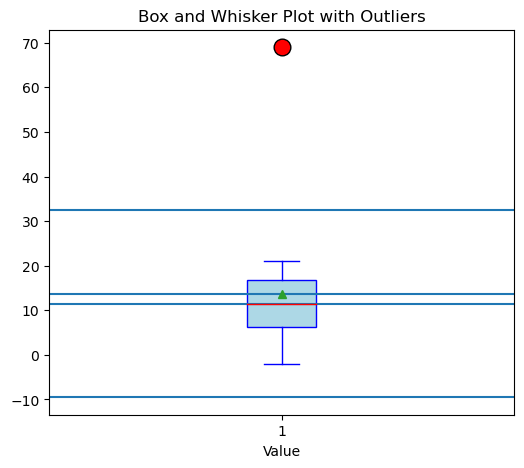

Q1: 6.25, Q3: 16.75, IQR: 10.5
Lower bound: -9.5, Upper bound: 32.5
Outliers: [69]


In [39]:
# Create box plot
plt.figure(figsize=(6, 5))
plt.boxplot(df, vert=True, showmeans=True, patch_artist=True, 
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            medianprops=dict(color='red'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=12, linestyle='none'))

plt.axhline(data.mean())
plt.axhline(np.median(data))
plt.axhline(lower_bound)
plt.axhline(upper_bound)


plt.title('Box and Whisker Plot with Outliers')
plt.xlabel('Value')
plt.show()

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
print(f"Outliers: {outliers}")

In [36]:
# !pip install cufflinks

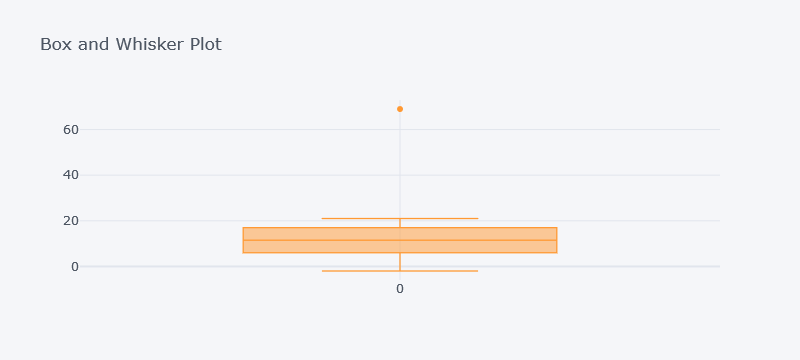

In [42]:
import pandas as pd
from plotly.offline import init_notebook_mode, iplot
import cufflinks as cf

# Initialize cufflinks in offline mode
init_notebook_mode(connected=True)
cf.go_offline()

df = pd.DataFrame(data)
df.iplot(kind='box', x='Category', y='Values',  boxpoints='outliers',  title='Box and Whisker Plot')


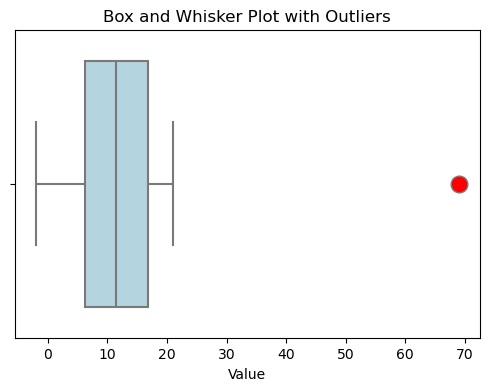

In [41]:
import seaborn as sns

# Create box plot using Seaborn
plt.figure(figsize=(6, 4))
sns.boxplot(x=data, color='lightblue', flierprops=dict(markerfacecolor='red', marker='o', markersize=12, linestyle='none'))
plt.title('Box and Whisker Plot with Outliers')
plt.xlabel('Value')
plt.show()


### Outlier Analysis Based on Standard Deviations

**Definition**:
Another method to identify outliers is based on the number of standard deviations from the mean.

**Steps**:
1. Calculate the mean ($\mu$) and standard deviation ($\sigma$) of the dataset.
2. Determine the threshold for outliers, typically 2 or 3 standard deviations from the mean.
3. Identify data points outside these bounds:
   - Lower bound: $ \mu - k \sigma $
   - Upper bound: $ \mu + k \sigma $
   where $ k $ is the number of standard deviations (commonly 2 or 3).


In [62]:
mean = np.mean(data)
std_dev = np.std(data)
k = 1.69  # Number of standard deviations for outlier detection
lower_bound_sd = mean - k * std_dev
upper_bound_sd = mean + k * std_dev

In [63]:
lower_bound_sd, upper_bound_sd

(-9.166088529870336, 36.43881580259761)

In [64]:
# Identify outliers based on standard deviation
outliers_sd = [x for x in data if x < lower_bound_sd or x > upper_bound_sd]

print(f"Mean: {mean}, Standard Deviation: {std_dev}")
print(f"Lower bound (3 std dev): {lower_bound_sd}, Upper bound (3 std dev): {upper_bound_sd}")
print(f"Outliers (Standard Deviation method): {outliers_sd}")


Mean: 13.636363636363637, Standard Deviation: 13.492575246292292
Lower bound (3 std dev): -9.166088529870336, Upper bound (3 std dev): 36.43881580259761
Outliers (Standard Deviation method): [69]
